<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#データ読み込み" data-toc-modified-id="データ読み込み-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>データ読み込み</a></span></li><li><span><a href="#距離" data-toc-modified-id="距離-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>距離</a></span></li><li><span><a href="#係数ベクトルdLw" data-toc-modified-id="係数ベクトルdLw-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>係数ベクトルdLw</a></span></li><li><span><a href="#wの更新" data-toc-modified-id="wの更新-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>wの更新</a></span></li><li><span><a href="#最急降下の繰り返し" data-toc-modified-id="最急降下の繰り返し-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>最急降下の繰り返し</a></span></li><li><span><a href="#QR分解" data-toc-modified-id="QR分解-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>QR分解</a></span></li><li><span><a href="#結果" data-toc-modified-id="結果-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>結果</a></span></li></ul></div>

<br />

<div style="text-align: center;">
<font size="5">数式処理group work-3(線形代数)解答例</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">file:/~/python/doing_math_with_python/symbolic_math/group_works/group_work_3_ans.ipynb</font>
<br />
<font size="4">cc by Shigeto R. Nishitani 2009-2018  </font>
</div> 



In [1]:
def print_w(w):
    params = ["radius", "texture","perimeter","area",
              "smoothness","compactness","concavity","concave points",
              "symmetry","fractal dimension"]
    print("    (params)      :    ",end="")
    print("   (mean)     (stderr)      (worst)")
    for i, param in enumerate(params):
        print("%18s:" %param, end="")
        for j in range(3):
            print("%13.9f" % w[i*3+j], end="")
        print()

In [2]:
import numpy as np
tmp = np.fromfile('./train_A.data', np.float64, -1, " ")
A = tmp.reshape(300,30)
tmp = np.fromfile('./train_b.data', np.float64, -1, " ")
b = tmp.reshape(300,1)
w = np.zeros(30).reshape(30,1)
for i in range(30):
    w[i] = 0.0001
#     w[i] = 0

# データ読み込み

テストデータを読み込み，仮説ベクトル$\boldsymbol{w}$の初期値を全て0.0001として，最初の30データの正誤を表示せよ．テキストのshow_accuracyを少し改良すればできる．

In [3]:
def show_accuracy(mA, vb, vw):
    # M:悪性(-1)，B:良性(1)

    correct,safe_error,critical_error=0,0,0
    predict = mA.dot(vw)
    n = vb.size
#     n=30
    for i in range(n):
        if predict[i]*vb[i]>0:
            correct += 1
        elif (predict[i]<0 and vb[i]>0):
            critical_error += 1
        elif (predict[i]>0 and vb[i]<0):
            safe_error += 1
    print("       correct: %4d/%4d" % (correct,n))
    print("    safe error: %4d" % safe_error)
    print("critical error: %4d" % critical_error)


In [4]:
show_accuracy(A, b, w)

       correct:  154/ 300
    safe error:  146
critical error:    0


# 距離
1. 行列$A$, ベクトル$w,b$の形状（shape）を確かめよ．
1. また，$A.w$の形状を確かめよ．
1. さらに$A.w-b$のベクトルの2乗$||A.w -b ||^2$を計算せよ．
1. $A.w$と$b$の距離とは乳がんの分類器においては何を意味するか？

In [5]:
A.shape

(300, 30)

In [6]:
w.shape

(30, 1)

In [7]:
b.shape

(300, 1)

In [8]:
Aw=np.dot(A,w)
Aw.shape

(300, 1)

In [22]:
LL=np.dot(A,ww)-b
np.dot(LL.transpose(),LL)

array([[77.50051002]])

A[i]にはデータが入っている．またwは分類器である．これらの積$A[i].w$は悪性か良性かを判断
する数値を与える．従ってそのベクトルの距離は，全てのデータに対する正誤の2乗和となる．

# 係数ベクトルdLw
最急降下法による仮説ベクトル$\boldsymbol{w}$の最適化を試みる．
最急降下法の概念図を以下に示した．損失関数の値$L(\boldsymbol{w})$
をz軸にとって(x,y)平面を$\boldsymbol{w}$と見立てて，
その勾配$dL/dw$に従って極小値を求めるステップを
刻んでいく様子を示している．
(単なるイメージ図なんで，コードの中身は無視して下さい)


<IPython.core.display.Javascript object>


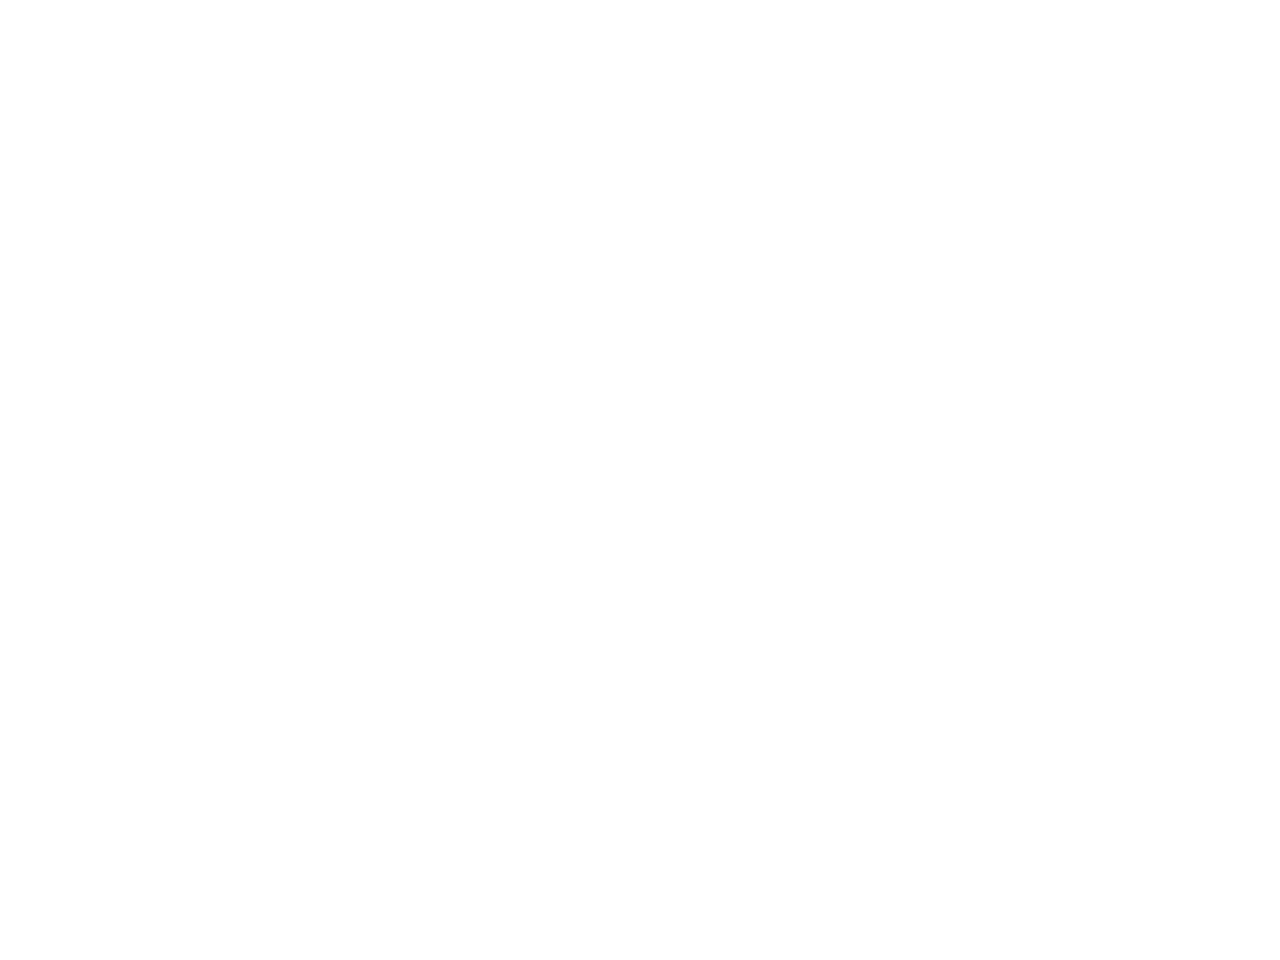

In [10]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def f(x,y):
    return x**2+y**2+x*y

x = np.arange(-np.pi, np.pi, 0.02)
y = np.arange(-np.pi, np.pi, 0.02)
X, Y = np.meshgrid(x, y)
Z1 = f(X,Y)

x_p = [2, 1, 0.5]
y_p = [2, 1, 0.5]
z_p = [f(x_p[0], y_p[0]),f(x_p[1], y_p[1]),
      f(x_p[2], y_p[2])]
    
fig = plt.figure()
plot3d = Axes3D(fig)
plot3d.plot(x_p, y_p, z_p, "o-", color="red")
plot3d.plot_surface(X,Y,Z1,alpha=0.6) 

plt.show()

損失関数の偏微分
$$
\begin{aligned}
\frac{\partial L}{\partial w_j} &= 
\sum_{i=1}^n \frac{\partial}{\partial w_j}(A_i \cdot w -b_i)^2 \\
&= \sum_{i=1}^n 2(A_i \cdot w -b_i) A_{ij}
\end{aligned}
$$
の最後の式の$A_{ij}$の係数ベクトルをdLwとして求めよ．その次元をshapeで確かめよ．

In [11]:
dLw = A.dot(w)-b
dLw

array([[ 1.35661785],
       [ 1.37409235],
       [ 1.33873926],
       [ 1.12400018],
       [ 1.33366842],
       [ 1.15055453],
       [ 1.30679374],
       [ 1.18144379],
       [ 1.15648972],
       [ 1.14934344],
       [ 1.2312545 ],
       [ 1.2463195 ],
       [ 1.29684708],
       [ 1.20018773],
       [ 1.15878715],
       [ 1.19595296],
       [ 1.21774582],
       [ 1.2510381 ],
       [ 1.41973415],
       [-0.84447122],
       [-0.85853014],
       [-0.92177626],
       [ 1.20323994],
       [ 1.45552255],
       [ 1.36149336],
       [ 1.28429154],
       [ 1.1875953 ],
       [ 1.29502403],
       [ 1.24021062],
       [ 1.25732182],
       [ 1.32599456],
       [ 1.165117  ],
       [ 1.26626939],
       [ 1.34408846],
       [ 1.2430429 ],
       [ 1.24816549],
       [ 1.17559798],
       [-0.86768616],
       [ 1.17874232],
       [ 1.15944313],
       [ 1.1645429 ],
       [ 1.11472969],
       [ 1.32818368],
       [ 1.17689813],
       [ 1.15630145],
       [ 1

In [12]:
dLw.shape

(300, 1)

# wの更新

係数ベクトルdLwとAのdot積が勾配ベクトルとなる．
$$
w = w - \sigma(dLw^t \cdot A)^t
$$
として仮説ベクトル$w$を勾配に従って進めたベクトルを求めよ．
ここで$\sigma$はステップ幅と呼ばれ，勾配に従ってどの程度進むかを調整するパラメータで，大きすぎると最適値を通り越し，小さすぎると最適値にたどり着くまでに繰り返し(iteration)が多くなる．ここでは，`3.0*10**(-9)`程度とせよ．

In [13]:
sigma=3.0*10**(-9)
w=w-sigma*(np.dot(dLw.transpose(),A)).transpose()
w

array([[ 9.52538887e-05],
       [ 9.50179839e-05],
       [ 6.78026274e-05],
       [-2.48336464e-04],
       [ 9.99806625e-05],
       [ 9.99513077e-05],
       [ 9.99334638e-05],
       [ 9.99631166e-05],
       [ 9.99635292e-05],
       [ 9.99905818e-05],
       [ 9.97828475e-05],
       [ 9.98333297e-05],
       [ 9.84204753e-05],
       [ 6.91503710e-05],
       [ 9.99992205e-05],
       [ 9.99909039e-05],
       [ 9.99891209e-05],
       [ 9.99960503e-05],
       [ 9.99972627e-05],
       [ 9.99993087e-05],
       [ 9.36564057e-05],
       [ 9.28645772e-05],
       [ 5.65976938e-05],
       [-4.59620941e-04],
       [ 9.99699358e-05],
       [ 9.98605409e-05],
       [ 9.98231691e-05],
       [ 9.99299273e-05],
       [ 9.99270018e-05],
       [ 9.99805567e-05]])

# 最急降下の繰り返し
先ほどの漸近操作を300回程度繰り返し，その前後でwを表示してみよ．
最初の30データの予測値を比較せよ．

In [14]:
print_w(w)
show_accuracy(A,b,w)

    (params)      :       (mean)     (stderr)      (worst)
            radius:  0.000095254  0.000095018  0.000067803
           texture: -0.000248336  0.000099981  0.000099951
         perimeter:  0.000099933  0.000099963  0.000099964
              area:  0.000099991  0.000099783  0.000099833
        smoothness:  0.000098420  0.000069150  0.000099999
       compactness:  0.000099991  0.000099989  0.000099996
         concavity:  0.000099997  0.000099999  0.000093656
    concave points:  0.000092865  0.000056598 -0.000459621
          symmetry:  0.000099970  0.000099861  0.000099823
 fractal dimension:  0.000099930  0.000099927  0.000099981
       correct:  146/ 300
    safe error:    0
critical error:  154


In [15]:
sigma=3.0*10**(-9)
for i in range(300):
    dLw = A.dot(w)-b
    w=w-sigma*(np.dot(dLw.transpose(),A)).transpose()

In [16]:
print_w(w)
show_accuracy(A,b,w)

    (params)      :       (mean)     (stderr)      (worst)
            radius:  0.000521147  0.000830565  0.002610776
           texture:  0.001656688  0.000104646  0.000100058
         perimeter:  0.000095983  0.000097902  0.000108838
              area:  0.000103554  0.000102348  0.000169429
        smoothness:  0.000099522 -0.000795121  0.000100425
       compactness:  0.000100420  0.000100697  0.000100259
         concavity:  0.000101184  0.000100187  0.000505184
    concave points:  0.001006849  0.002453114 -0.001933241
          symmetry:  0.000105845  0.000096075  0.000091685
 fractal dimension:  0.000097602  0.000111376  0.000103466
       correct:  274/ 300
    safe error:   21
critical error:    5


# QR分解

行列$A$のnp.linalg.qrを用いてQR分解を行い，Q, R行列の次元をshapeで確かめよ．

In [17]:
import numpy as np

tmp = np.fromfile('./train_A.data', np.float64, -1, " ")
A = tmp.reshape(300,30)
tmp = np.fromfile('./train_b.data', np.float64, -1, " ")
b = tmp.reshape(300,1)

q, r = np.linalg.qr(A)

In [18]:
ww = np.linalg.inv(r).dot(np.transpose(q).dot(b))
ww

array([[ 8.69921844e-01],
       [-2.43139475e-02],
       [-6.26795610e-02],
       [-3.27461924e-03],
       [-8.79030086e+00],
       [ 1.74714750e+00],
       [-2.02849407e-01],
       [-6.50645110e+00],
       [ 5.06176045e+00],
       [ 4.91675416e+01],
       [-9.56591421e-01],
       [-8.20526583e-02],
       [-7.94315708e-03],
       [ 4.97690755e-03],
       [-2.78419444e+01],
       [ 3.30152711e+00],
       [ 4.98595913e+00],
       [-1.63188863e+01],
       [ 1.03162891e+01],
       [-2.13322322e+01],
       [-4.08605816e-01],
       [-3.34572209e-03],
       [-6.77873131e-04],
       [ 2.51073505e-03],
       [ 4.53136972e+00],
       [ 5.90110016e-01],
       [-7.19368704e-01],
       [-2.15896530e+00],
       [-3.80346722e+00],
       [-1.22984170e+01]])

In [19]:
q.shape

(300, 30)

In [20]:
show_accuracy(A, b, ww)
print_w(ww)

       correct:  286/ 300
    safe error:   13
critical error:    1
    (params)      :       (mean)     (stderr)      (worst)
            radius:  0.869921844 -0.024313948 -0.062679561
           texture: -0.003274619 -8.790300861  1.747147500
         perimeter: -0.202849407 -6.506451098  5.061760446
              area: 49.167541566 -0.956591421 -0.082052658
        smoothness: -0.007943157  0.004976908-27.841944367
       compactness:  3.301527110  4.985959134-16.318886295
         concavity: 10.316289081-21.332232171 -0.408605816
    concave points: -0.003345722 -0.000677873  0.002510735
          symmetry:  4.531369718  0.590110016 -0.719368704
 fractal dimension: -2.158965299 -3.803467225-12.298417038


# 結果
仮説ベクトル$\boldsymbol{w}$の最適値
$$
ww =  R^{-1}.Q^t.b
$$
を求めよ．その値と精度を確かめよ．また距離の2乗
$$
||A.w -b ||^2
$$
が下がっていることを確かめよ．

In [21]:
LL=np.dot(A,w)-b
np.dot(LL.transpose(),LL)

array([[201.56517444]])